<a href="https://colab.research.google.com/github/SnehhaPadmanabhan/Bertelsmann-AI-Challenge/blob/master/RNN_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What is time series prediction**

Time series is the collection of data points at a constant interval of time.These are analyzed to determine the long term trend so as to forecast the future or perform some other form of analysis

**How is it different from regular regression problems**

1. It is *time dependent*. So the basic assumption of a linear regression model that the observations are independent doesn’t hold in this case.

2. Along with an increasing or decreasing trend, most TS have some form of *seasonality trends*, i.e. variations specific to a particular time frame. For example, if you see the sales of a woolen jacket over time, you will invariably find higher sales in winter seasons

In [0]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**linspace** - returns a number space spread evenly in the give interval

numpy.linspace(start, stop, num = 50, endpoint = True, retstep = False, dtype = None)

start - starting point of the interval

stop - ending point of the interval

num - number of samples to generate

dtype - output array type

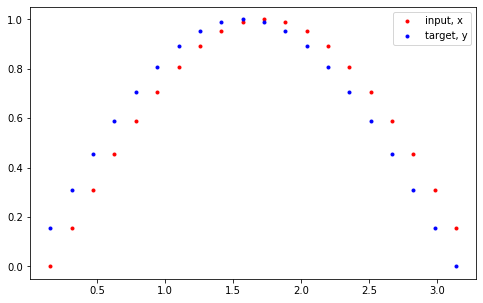

In [2]:
plt.figure(figsize = (8,5))
# how many time steps or data points are there in one batch of data
seq_length = 20 
# generates evenly space data points
time_steps = np.linspace(0, np.pi, seq_length+1)
data = np.sin(time_steps)
data.resize((seq_length+1, 1))
x = data[:-1]
y = data[1:]
plt.plot(time_steps[1:], x, 'r.', label = 'input, x')
plt.plot(time_steps[1:], y, 'b.', label = 'target, y') 
plt.legend(loc = 'best') # legend is the scale of the graph drawn
plt.show()

In [0]:
class RNN(nn.Module):
  def __init__(self, input_size, output_size, hidden_dim, n_layers):
    super(RNN,self).__init__()
    self.hidden_dim = hidden_dim
    self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first = True)
    self.fc = nn.Linear(hidden_dim, output_size)

  def forward(self, x, hidden):
    batch_size = x.size(0)
    rout, hidden = self.rnn(x, hidden)
    rout = rout.view(-1,self.hidden_dim)
    output = self.fc(rout)
    return output, hidden

In [5]:
test_rnn = RNN(input_size=1, output_size=1, hidden_dim=10, n_layers=2)
time_steps = np.linspace(0, np.pi, seq_length)
data = np.sin(time_steps)
data.resize((seq_length, 1))
test_input = torch.Tensor(data).unsqueeze(0) # give it a batch_size of 1 as first dimension
print('Input size: ', test_input.size())
test_out, test_h = test_rnn(test_input, None)
print('Output size: ', test_out.size())
print('Hidden state size: ', test_h.size())

Input size:  torch.Size([1, 20, 1])
Output size:  torch.Size([20, 1])
Hidden state size:  torch.Size([2, 1, 10])


In [7]:
input_size=1 
output_size=1
hidden_dim=32
n_layers=1
rnn = RNN(input_size, output_size, hidden_dim, n_layers)
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [0]:
criterion = nn.MSELoss() # mean squared error loss for regression
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)

In [0]:


# train the RNN
def train(rnn, n_steps, print_every):
    
    # initialize the hidden state
    hidden = None      
    
    for batch_i, step in enumerate(range(n_steps)):
        # defining the training data 
        time_steps = np.linspace(step * np.pi, (step+1)*np.pi, seq_length + 1)
        data = np.sin(time_steps)
        data.resize((seq_length + 1, 1)) # input_size=1

        x = data[:-1]
        y = data[1:]
        
        # convert data into Tensors
        x_tensor = torch.Tensor(x).unsqueeze(0) # unsqueeze gives a 1, batch_size dimension
        y_tensor = torch.Tensor(y)

        # outputs from the rnn
        prediction, hidden = rnn(x_tensor, hidden)

        ## Representing Memory ##
        # make a new variable for hidden and detach the hidden state from its history
        # this way, we don't backpropagate through the entire history
        hidden = hidden.data

        # calculate the loss
        loss = criterion(prediction, y_tensor)
        # zero gradients
        optimizer.zero_grad()
        # perform backprop and update weights
        loss.backward()
        optimizer.step()

        # display loss and predictions
        if batch_i%print_every == 0:        
            print('Loss: ', loss.item())
            plt.plot(time_steps[1:], x, 'r.') # input
            plt.plot(time_steps[1:], prediction.data.numpy().flatten(), 'b.') # predictions
            plt.show()
    
    return rnn

Loss:  0.7920529246330261


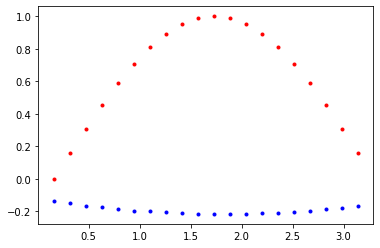

Loss:  0.04894178360700607


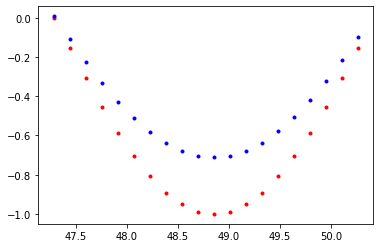

Loss:  0.008042612113058567


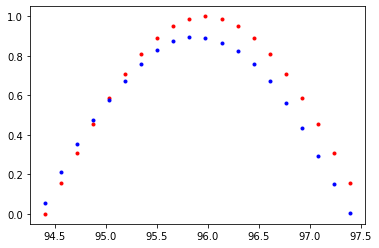

Loss:  0.0005547761102207005


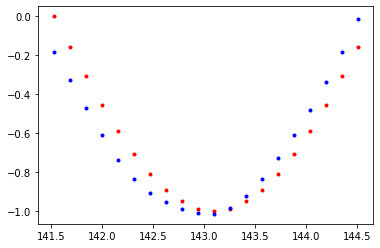

Loss:  0.00036808184813708067


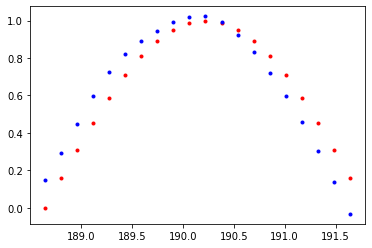

In [10]:
n_steps = 75
print_every = 15
trained_rnn = train(rnn, n_steps, print_every)